# Exploratory Data Analysis
This phase of the ROSEMED process is the most involved, and includes creating visualizations and statistics to analyze and evaluate the interactions between the features in the data set.

We will aim to produce a dataset that is ideal for Linear Regression. The most important things to consider will be the main 3 assumptions: linearity and a constant slope, normality of the resulting residuals, and homoscedasticity where the resulting residuals do not have any outliers.

In order to monitor our progress and to ensure we are constantly improving, we will create a model after each step and measure the outcomes so we can inspect for the 3 assumptions and make sure we are improving in all areas.

In [1]:
# graphing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context('notebook')
%matplotlib inline

In [2]:
# import our module for tracking model performance
import model as sc

In [3]:
model = sc.Scores()

In [4]:
import pandas as pd
df = pd.read_csv('../data/processed/housing_data.csv', index_col=0)

In [5]:
df.head()

,id,school_kms,school_mins,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,median_household_income,median_home_value,walk_score,transit_score,bike_score
8,1200019,18.352,26.150,647500.0,4,1.75,2060,26036,1.0,0.0,...,98166,47.4444,-122.351,2590,21891,63320,386900,10.0,-1.0,18.0
9,1200021,18.372,25.700,400000.0,3,1.00,1460,43000,1.0,0.0,...,98166,47.4434,-122.347,2250,20023,63320,386900,9.0,-1.0,24.0
10,2800031,18.673,17.917,235000.0,3,1.00,1430,7599,1.5,0.0,...,98168,47.4783,-122.265,1290,10320,49233,240000,34.0,-1.0,25.0
11,3600057,9.392,10.567,402500.0,4,2.00,1650,3504,1.0,0.0,...,98144,47.5803,-122.294,1480,3504,55950,391000,80.0,-1.0,73.0
12,3600072,9.370,10.483,680000.0,4,2.75,2220,5310,1.0,0.0,...,98144,47.5801,-122.294,1540,4200,55950,391000,80.0,-1.0,73.0


## Linearity:
First, linear regression needs the relationship between the independent and dependent variables to be linear.  It is also important to check for outliers since linear regression is sensitive to outlier effects.  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14280 entries, 8 to 22670
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14280 non-null  int64  
 1   school_kms               14280 non-null  float64
 2   school_mins              14280 non-null  float64
 3   price                    14280 non-null  float64
 4   bedrooms                 14280 non-null  int64  
 5   bathrooms                14280 non-null  float64
 6   sqft_living              14280 non-null  int64  
 7   sqft_lot                 14280 non-null  int64  
 8   floors                   14280 non-null  float64
 9   view                     14280 non-null  float64
 10  condition                14280 non-null  int64  
 11  grade                    14280 non-null  int64  
 12  sqft_above               14280 non-null  int64  
 13  sqft_basement            14280 non-null  int64  
 14  yr_built              

In [7]:
# dropping any columns that do not show a linear relationship
to_check = df.drop(
    ['id','price', 'lat', 'long', 'sqft_basement', 'school_mins', 'median_household_income',
     'yr_built','sqft_lot', 'sqft_lot15', 'condition', 'walk_score', 'floors', 'bedrooms', 'view',
     'transit_score', 'zipcode', 'bathrooms'], axis=1).columns

In [8]:
df[to_check].dtypes

school_kms           float64
sqft_living            int64
grade                  int64
sqft_above             int64
sqft_living15          int64
median_home_value      int64
bike_score           float64
dtype: object

### Scatterplot with Regression line

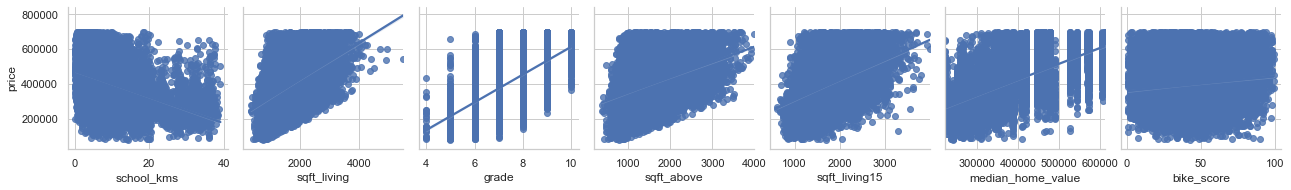

In [9]:
sns.pairplot(x_vars=to_check, y_vars='price', data=df, kind='reg');

In [10]:
(df['sqft_living15'] < 500).sum()

0

## Multivariate Normality:
Secondly, the linear regression analysis requires all variables to be multivariate normal.  This assumption can best be checked with a histogram or a Q-Q-Plot.  Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.

In [11]:
for col in to_check:
    print(col)
    model.evaluate_model(f'checking {col} for normality', df[['price', col]])

school_kms
sqft_living
grade
sqft_above
sqft_living15
median_home_value
bike_score


In [12]:
model.scores.sort_values('5-Fold Cross Validation', ascending=False)

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
5,checking median_home_value for normality,"(104723.550, 105603.778)","(0.404, 0.400)","(0.404, 0.400)",0.399
2,checking grade for normality,"(116549.336, 119939.857)","(0.259, 0.234)","(0.259, 0.234)",0.250
0,checking school_kms for normality,"(117945.515, 117812.259)","(0.249, 0.240)","(0.249, 0.240)",0.243
1,checking sqft_living for normality,"(119671.813, 118745.592)","(0.221, 0.243)","(0.221, 0.243)",0.224
4,checking sqft_living15 for normality,"(123336.260, 122486.697)","(0.175, 0.189)","(0.175, 0.189)",0.175
3,checking sqft_above for normality,"(126416.471, 124659.658)","(0.137, 0.147)","(0.137, 0.147)",0.136
6,checking bike_score for normality,"(134393.328, 135041.186)","(0.019, 0.016)","(0.019, 0.016)",0.015


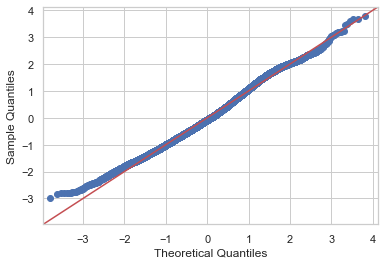

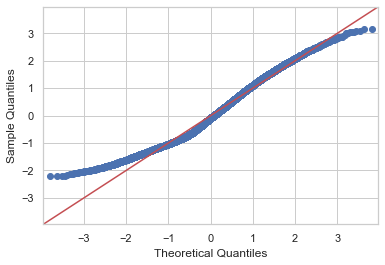

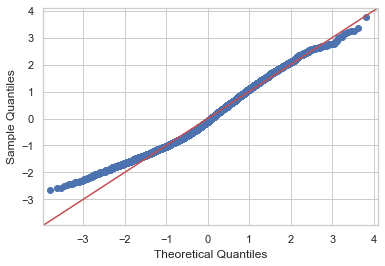

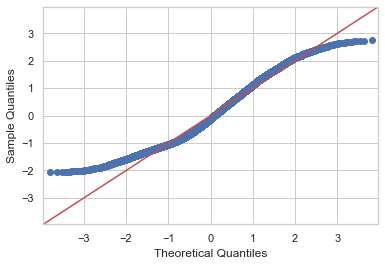

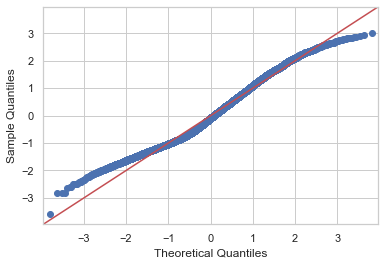

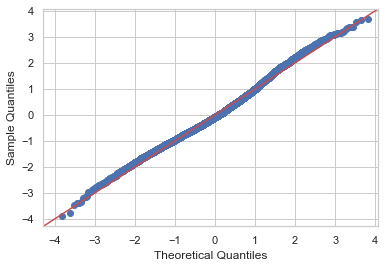

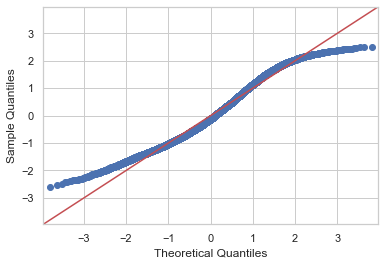

In [13]:
for i in range(len(model.sm_results)):
    model.plot_qq(i);

Definately not normally distributed residuals. Maybe a power transfrom will make it more uniform.
Time to plot some histograms to look for skewdnes.

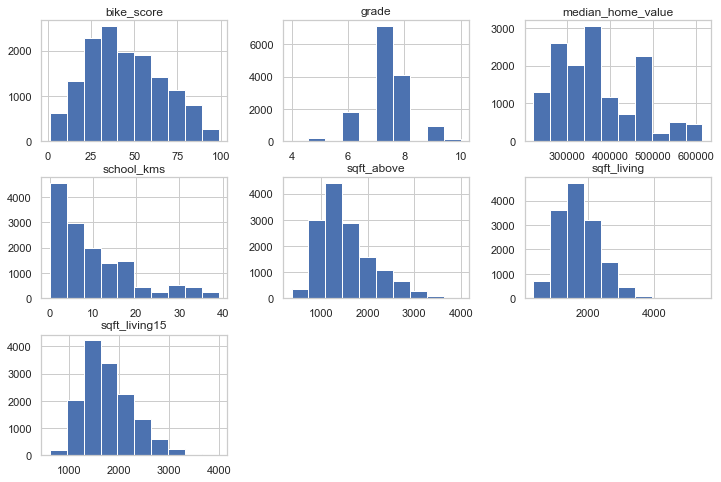

In [14]:
df[to_check].hist(figsize=(12, 8));

In [15]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
to_transform= ['bike_score', 'bedrooms', 'median_household_income', 'median_home_value', 'school_kms', 'grade',
               'school_mins', 'sqft_above', 'sqft_living', 'sqft_living15', 'walk_score']
df[to_transform] = qt.fit_transform(df[to_transform])

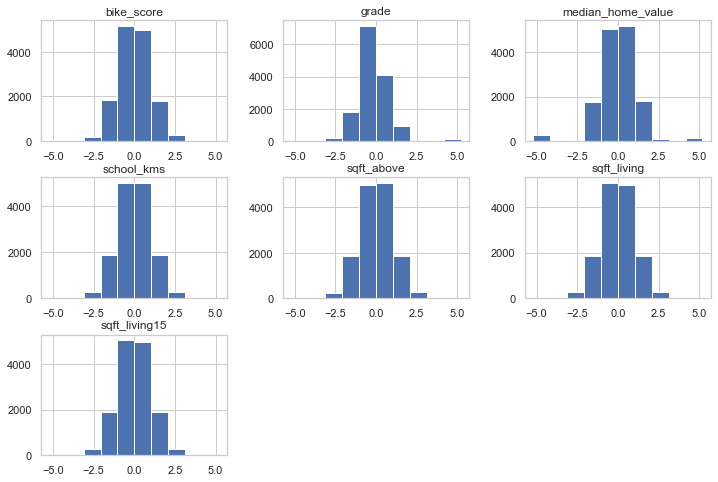

In [16]:
df[to_check].hist(figsize=(12, 8));

In [17]:
(df['school_kms'] < -4).sum()

1

In [18]:
#Finding a cutoff point
for col in ['bike_score', 'grade', 'median_home_value', 'school_kms', 'sqft_above', 'sqft_living', 'sqft_living15']:
    df = df[df[col].between(df[col].quantile(.07), df[col].quantile(.93))]

In [19]:
df

,id,school_kms,school_mins,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,median_household_income,median_home_value,walk_score,transit_score,bike_score
9,1200021,0.978904,1.366876,400000.0,-0.160010,1.00,-0.378977,43000,1.0,0.0,...,98166,47.4434,-122.347,0.930036,20023,-0.556927,0.404717,-1.104747,-1.0,-0.924252
12,3600072,0.238584,-0.149853,680000.0,5.199338,2.75,0.802226,5310,1.0,0.0,...,98144,47.5801,-122.294,-0.336178,4200,-0.840906,0.447305,1.179402,-1.0,1.149742
31,11200070,-1.177916,-1.255743,570000.0,-0.160010,2.50,-0.253606,3296,2.0,0.0,...,98007,47.6181,-122.138,-0.362850,4099,0.061513,0.329548,1.059682,-1.0,-0.403356
32,11200290,-1.190698,-1.264066,546000.0,-0.160010,2.50,-0.253606,3464,2.0,0.0,...,98007,47.6179,-122.141,-0.362850,3446,0.061513,0.329548,0.613509,-1.0,-0.085414
33,11200400,-1.164819,-1.247505,617000.0,-0.160010,2.50,0.358833,4488,2.0,0.0,...,98007,47.6176,-122.140,-0.362850,3696,0.061513,0.329548,0.613509,-1.0,-0.085414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22649,9834201367,0.307612,0.084155,429000.0,-0.160010,2.00,-0.321611,1126,3.0,0.0,...,98144,47.5699,-122.288,-0.708752,1230,-0.840906,0.447305,1.479004,-1.0,1.464186
22650,9834201370,0.310119,0.101796,430100.0,-0.160010,2.25,-0.492137,1078,2.0,0.0,...,98144,47.5701,-122.288,-0.654930,1230,-0.840906,0.447305,1.479004,-1.0,1.464186
22651,9834201375,0.312701,0.113114,425000.0,-0.160010,2.25,-0.452858,1230,2.0,0.0,...,98144,47.5703,-122.288,-0.708752,1230,-0.840906,0.447305,1.411293,-1.0,0.903301
22659,9839300545,0.113722,0.377221,605000.0,-1.340200,2.00,-0.733156,5500,1.5,0.0,...,98122,47.6121,-122.294,0.324254,4400,-0.897655,0.502074,2.063775,-1.0,1.184447


In [20]:
for col in to_check:
    print(col)
    model.evaluate_model(f'checking {col} for normality, after transform', df[['price', col]].dropna())

school_kms
sqft_living
grade
sqft_above
sqft_living15
median_home_value
bike_score


In [21]:
model.scores[len(to_check):]

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
7,"checking school_kms for normality, after trans...","(95766.753, 96088.430)","(0.296, 0.277)","(0.296, 0.277)",0.287
8,"checking sqft_living for normality, after tran...","(107721.460, 109267.055)","(0.097, 0.104)","(0.097, 0.104)",0.092
9,"checking grade for normality, after transform","(106548.780, 106729.136)","(0.125, 0.120)","(0.125, 0.120)",0.117
10,"checking sqft_above for normality, after trans...","(112824.965, 114346.903)","(0.014, 0.005)","(0.014, 0.005)",0.004
11,"checking sqft_living15 for normality, after tr...","(110736.585, 109424.593)","(0.056, 0.071)","(0.056, 0.071)",0.053
12,"checking median_home_value for normality, afte...","(85607.838, 84543.208)","(0.441, 0.429)","(0.441, 0.429)",0.430
13,"checking bike_score for normality, after trans...","(109733.194, 107463.131)","(0.084, 0.073)","(0.084, 0.073)",0.073


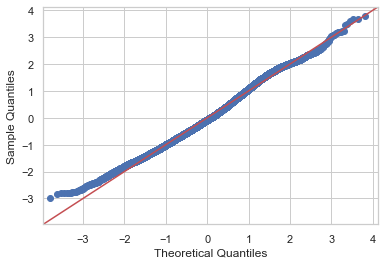

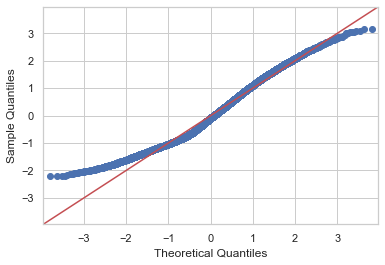

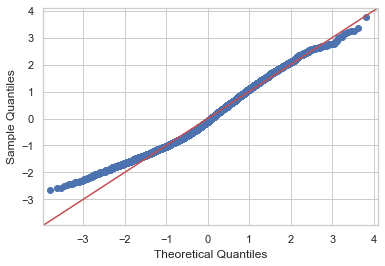

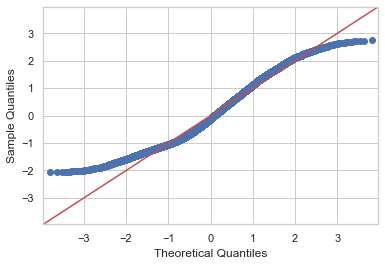

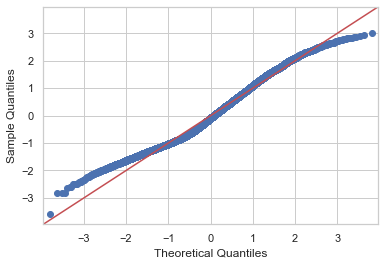

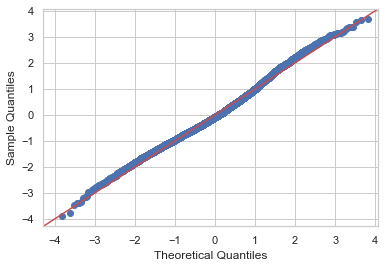

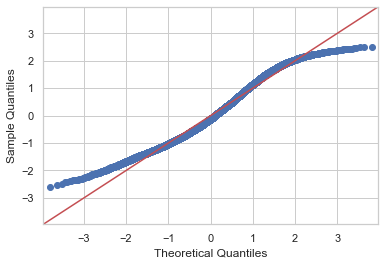

In [22]:
for i in range(len(model.sm_results[len(to_check):])):
    model.plot_qq(i);

## No multicollinearity 
Linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.

### Correlation matrix 

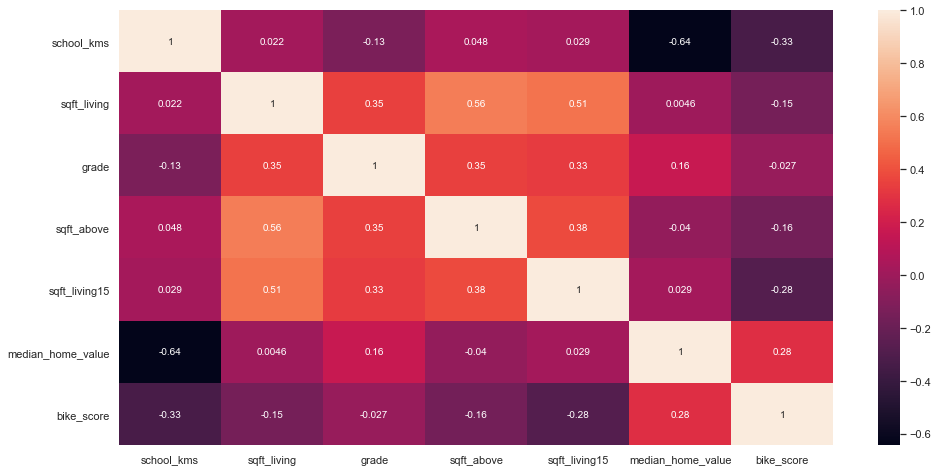

In [23]:
fig = plt.figure(figsize=(16, 8))
sns.heatmap(df[to_check].corr(), annot=True);

### Variance Inflation Factor (VIF) 

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[to_check]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(to_check, vif))

[('school_kms', 1.7899220696928198),
 ('sqft_living', 1.7642386749614423),
 ('grade', 1.283901494811622),
 ('sqft_above', 1.533481358547663),
 ('sqft_living15', 1.5539937432613964),
 ('median_home_value', 1.7561239295495663),
 ('bike_score', 1.2461705599318118)]

## Homoscedasticity:
The residuals are equal across the regression line

In [25]:
for i in range(len(model.sm_results)):
    print(model.sm_results[i].summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     4669.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        14:32:24   Log-Likelihood:            -1.8702e+05
No. Observations:               14280   AIC:                         3.740e+05
Df Residuals:                   14278   BIC:                         3.741e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.714e+05   1484.891    317.458      0.0

In [26]:
# to_drop = ['bedrooms','bike_score', 'walk_score', 'sqft_living15', 'sqft_above', 'view', 'floors', 'sqft_living', 'bathrooms']

In [27]:
columns_to_check = to_check.to_list()
columns_to_check.append('price')
model.evaluate_model(f'all', df[columns_to_check])

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
0,checking school_kms for normality,"(117945.515, 117812.259)","(0.249, 0.240)","(0.249, 0.240)",0.243
1,checking sqft_living for normality,"(119671.813, 118745.592)","(0.221, 0.243)","(0.221, 0.243)",0.224
2,checking grade for normality,"(116549.336, 119939.857)","(0.259, 0.234)","(0.259, 0.234)",0.250
3,checking sqft_above for normality,"(126416.471, 124659.658)","(0.137, 0.147)","(0.137, 0.147)",0.136
4,checking sqft_living15 for normality,"(123336.260, 122486.697)","(0.175, 0.189)","(0.175, 0.189)",0.175
5,checking median_home_value for normality,"(104723.550, 105603.778)","(0.404, 0.400)","(0.404, 0.400)",0.399
6,checking bike_score for normality,"(134393.328, 135041.186)","(0.019, 0.016)","(0.019, 0.016)",0.015
7,"checking school_kms for normality, after trans...","(95766.753, 96088.430)","(0.296, 0.277)","(0.296, 0.277)",0.287
8,"checking sqft_living for normality, after tran...","(107721.460, 109267.055)","(0.097, 0.104)","(0.097, 0.104)",0.092
9,"checking grade for normality, after transform","(106548.780, 106729.136)","(0.125, 0.120)","(0.125, 0.120)",0.117


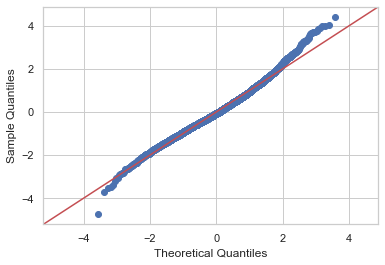

In [28]:
model.plot_qq();

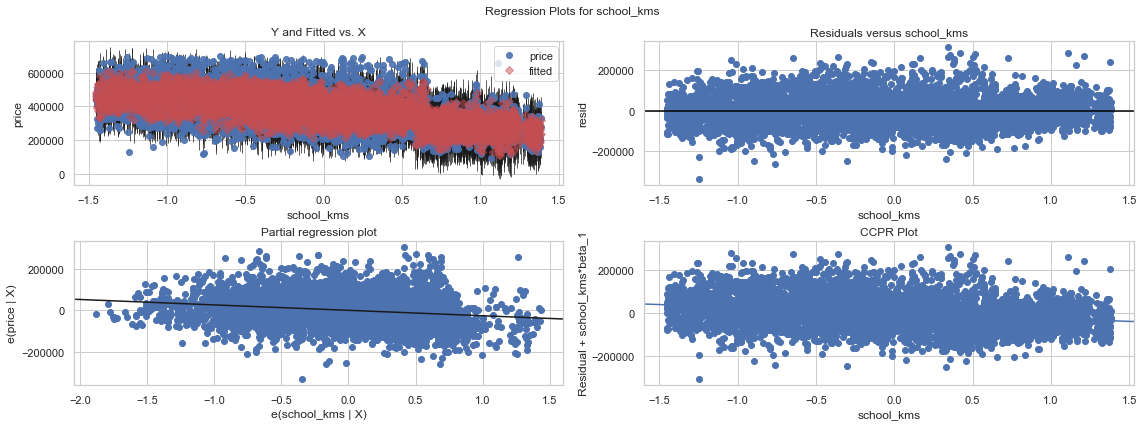

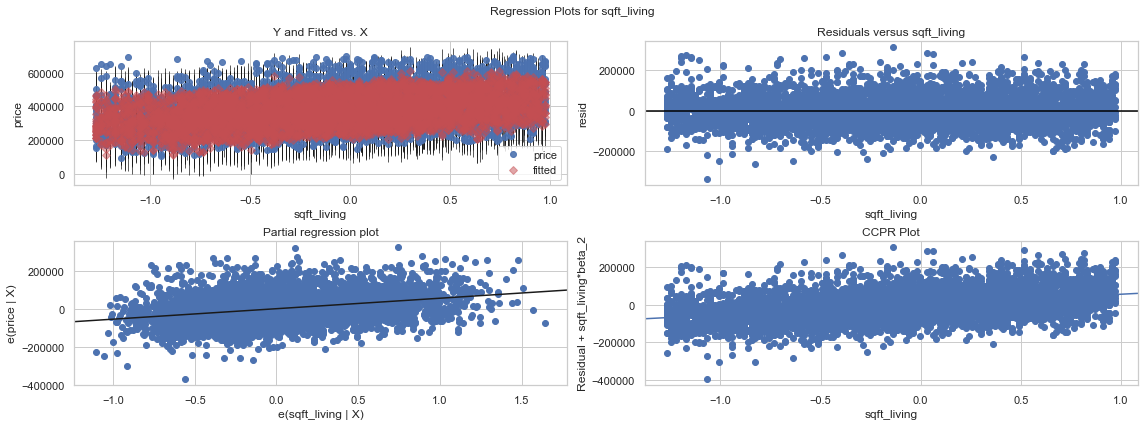

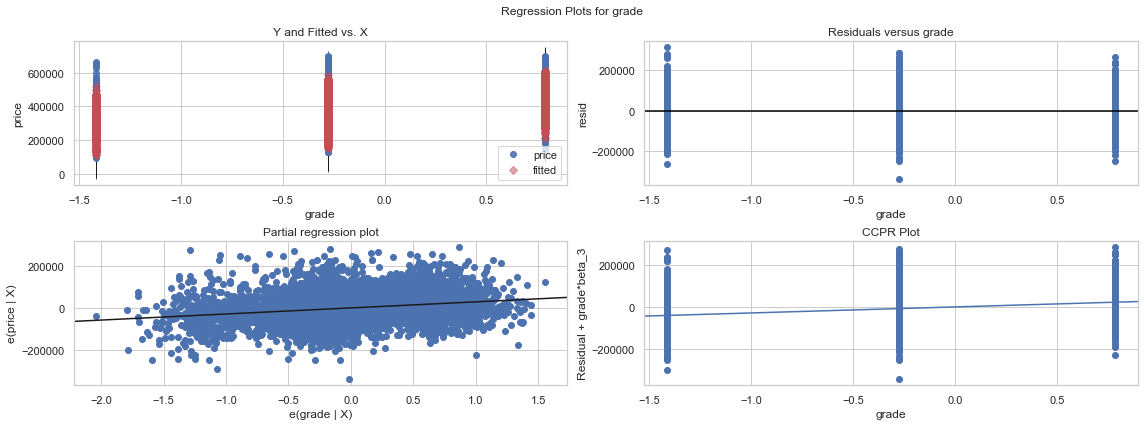

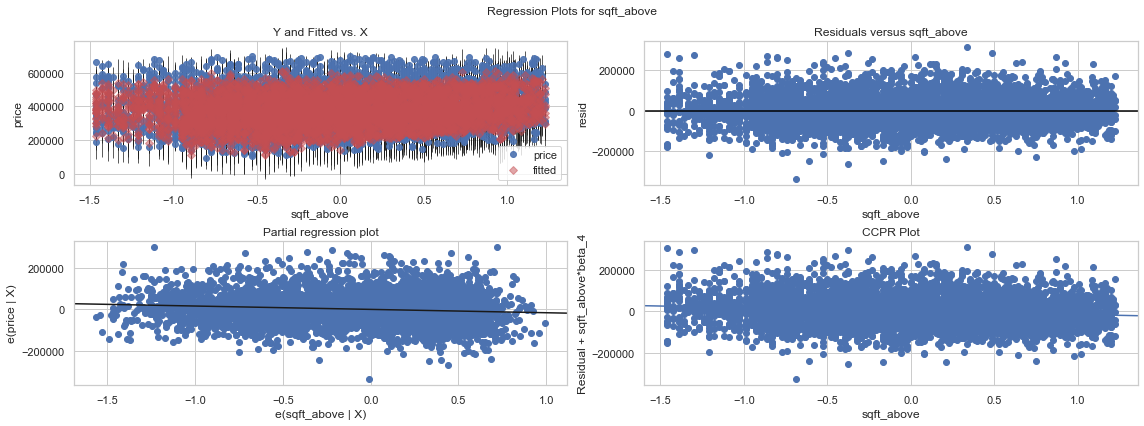

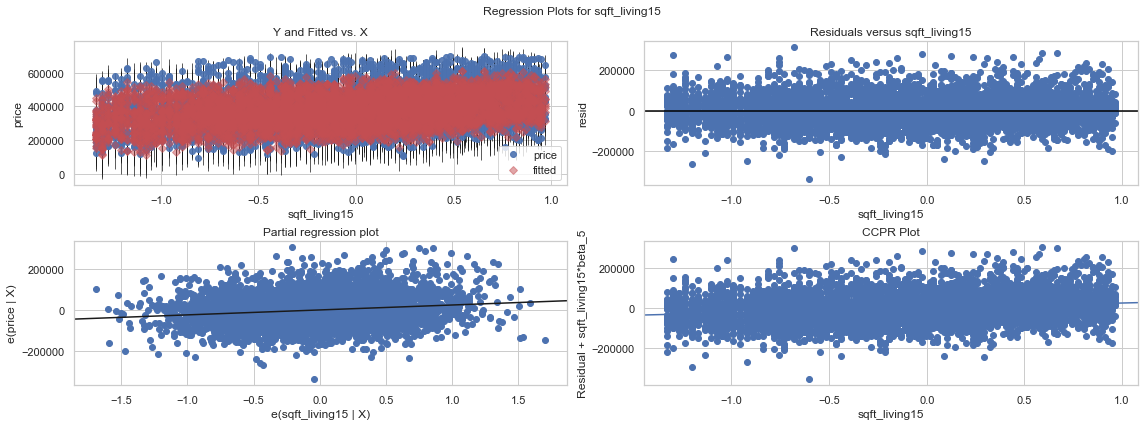

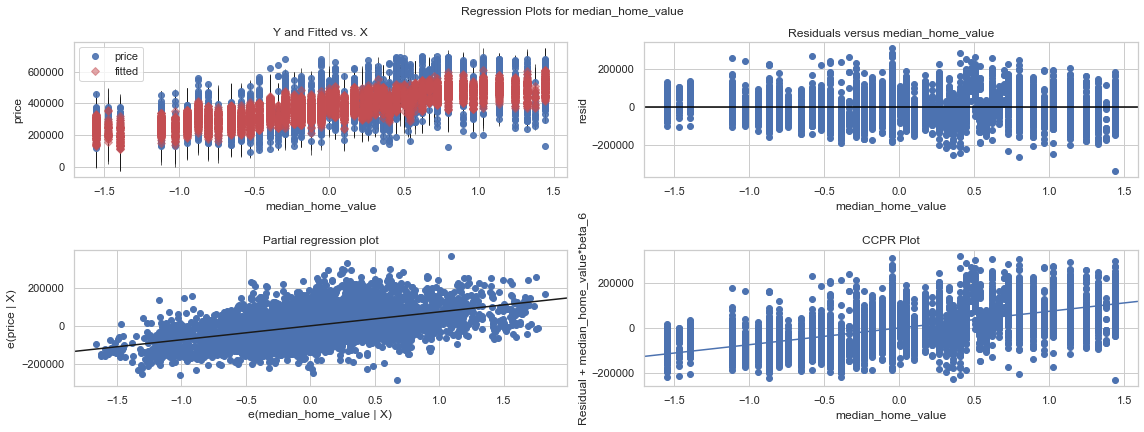

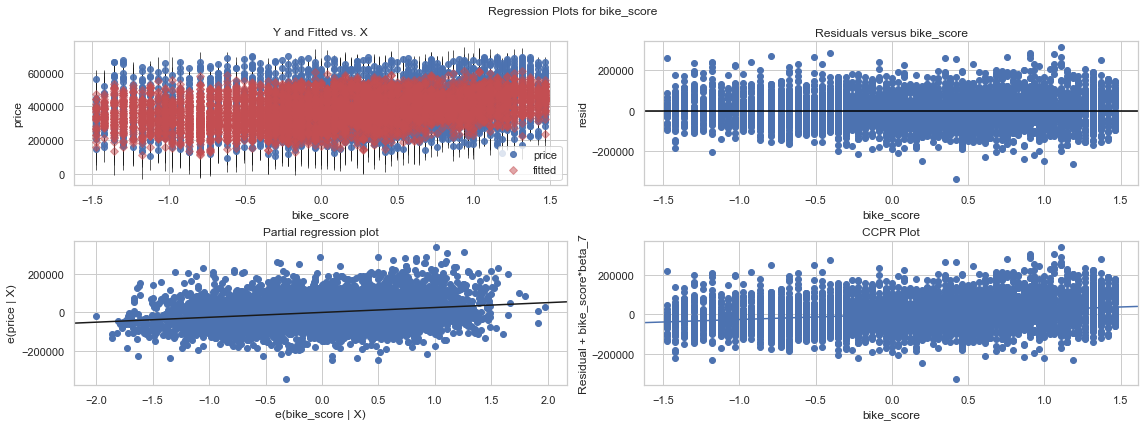

In [29]:
for col in to_check:
    fig = plt.figure(figsize=(16, 6))
    model.plot_feature(col, fig=fig)

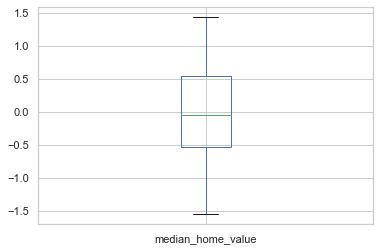

In [30]:
df['median_home_value'].plot.box()

In [31]:
df['median_home_value'].describe()

count    5514.000000
mean       -0.025242
std         0.736498
min        -1.550085
25%        -0.524976
50%        -0.050204
75%         0.540882
max         1.439001
Name: median_home_value, dtype: float64

In [32]:
model.sm_results[-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1251.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        14:32:41   Log-Likelihood:                -69400.
No. Observations:                5514   AIC:                         1.388e+05
Df Residuals:                    5506   BIC:                         1.389e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.873e+05    978.384    395.813      0.000    3.85e+05    3.89e+05
school_kms        -2.593e+04   1774.633    -14.609      0.000   -2.94e+04   -2.24e+04
sqft_living        5.495e+04   2219.673     24.756      0.000    5.06e+04    5.93e+04
grade              2.888e+04   1751.909     16.483      0.000    2.54e+04    3.23e+04
sqft_above        -1.628e+04   1894.452     -8.594      0.000      -2e+04   -1.26e+04
sqft_living15      2.424e+04   1994.131     12.154      0.000    2.03e+04    2.81e+04
median_home_value   7.39e+04   1715.357     43.081      0.000    7.05e+04    7.73e+04
bike_score         2.539e+04   1424.791     17.821      0.000    2.26e+04    2.82e+04
==============================================================================
Omnibus:                      181.842   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.539
Skew:                           0.348   Prob(JB):                     1.45e-55
Kurtosis:                       3.784   Cond. No.                         2.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from sklearn.preprocessing import PolynomialFeatures

y = df['price']
X = df[to_check]

poly = PolynomialFeatures(3)
X_fin = poly.fit_transform(X)

In [34]:
poly_df = pd.DataFrame(X_fin, columns=poly.get_feature_names())

In [35]:
y = y.reset_index().drop('index', axis=1)

In [36]:
poly_df['price'] = y

In [37]:
poly_df

,1,x0,x1,x2,x3,x4,x5,x6,x0^2,x0 x1,...,x4^2 x5,x4^2 x6,x4 x5^2,x4 x5 x6,x4 x6^2,x5^3,x5^2 x6,x5 x6^2,x6^3,price
0,1.0,0.978904,-0.378977,-0.276998,0.114415,0.930036,0.404717,-0.924252,0.958252,-0.370982,...,0.350067,-0.799447,0.152336,-0.347889,0.794475,0.066291,-0.151388,0.345726,-0.789534,400000.0
1,1.0,0.238584,0.802226,-0.276998,-0.526417,-0.336178,0.447305,1.149742,0.056922,0.191398,...,0.050552,0.129939,-0.067263,-0.172891,-0.444396,0.089498,0.230043,0.591296,1.519851,680000.0
2,1.0,-1.177916,-0.253606,0.785036,0.226489,-0.362850,0.329548,-0.403356,1.387487,0.298727,...,0.043388,-0.053106,-0.039406,0.048232,-0.059034,0.035789,-0.043805,0.053616,-0.065624,570000.0
3,1.0,-1.190698,-0.253606,0.785036,0.226489,-0.362850,0.329548,-0.085414,1.417761,0.301968,...,0.043388,-0.011246,-0.039406,0.010214,-0.002647,0.035789,-0.009276,0.002404,-0.000623,546000.0
4,1.0,-1.164819,0.358833,0.785036,0.751333,-0.362850,0.329548,-0.085414,1.356804,-0.417976,...,0.043388,-0.011246,-0.039406,0.010214,-0.002647,0.035789,-0.009276,0.002404,-0.000623,617000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,1.0,0.307612,-0.321611,0.785036,0.165095,-0.708752,0.447305,1.464186,0.094625,-0.098931,...,0.224695,0.735503,-0.141808,-0.464189,-1.519451,0.089498,0.292957,0.958951,3.138981,429000.0
5510,1.0,0.310119,-0.492137,0.785036,-1.210137,-0.654930,0.447305,1.464186,0.096174,-0.152621,...,0.191864,0.628039,-0.131040,-0.428939,-1.404067,0.089498,0.292957,0.958951,3.138981,430100.0
5511,1.0,0.312701,-0.452858,0.785036,-1.210137,-0.708752,0.447305,0.903301,0.097782,-0.141609,...,0.224695,0.453754,-0.141808,-0.286372,-0.578308,0.089498,0.180734,0.364980,0.737050,425000.0
5512,1.0,0.113722,-0.733156,0.785036,-0.276998,0.324254,0.502074,1.184447,0.012933,-0.083376,...,0.052788,0.124534,0.081737,0.192827,0.454901,0.126562,0.298573,0.704366,1.661677,605000.0


In [38]:
model.evaluate_model('polynomial', poly_df)

,Description,"RMSE (training, test)","R-squared (training, test)","Adjusted R-squared (training, test)",5-Fold Cross Validation
0,checking school_kms for normality,"(117945.515, 117812.259)","(0.249, 0.240)","(0.249, 0.240)",0.243
1,checking sqft_living for normality,"(119671.813, 118745.592)","(0.221, 0.243)","(0.221, 0.243)",0.224
2,checking grade for normality,"(116549.336, 119939.857)","(0.259, 0.234)","(0.259, 0.234)",0.250
3,checking sqft_above for normality,"(126416.471, 124659.658)","(0.137, 0.147)","(0.137, 0.147)",0.136
4,checking sqft_living15 for normality,"(123336.260, 122486.697)","(0.175, 0.189)","(0.175, 0.189)",0.175
5,checking median_home_value for normality,"(104723.550, 105603.778)","(0.404, 0.400)","(0.404, 0.400)",0.399
6,checking bike_score for normality,"(134393.328, 135041.186)","(0.019, 0.016)","(0.019, 0.016)",0.015
7,"checking school_kms for normality, after trans...","(95766.753, 96088.430)","(0.296, 0.277)","(0.296, 0.277)",0.287
8,"checking sqft_living for normality, after tran...","(107721.460, 109267.055)","(0.097, 0.104)","(0.097, 0.104)",0.092
9,"checking grade for normality, after transform","(106548.780, 106729.136)","(0.125, 0.120)","(0.125, 0.120)",0.117


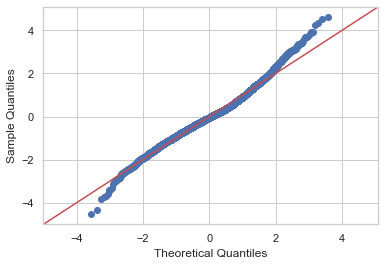

In [39]:
model.plot_qq();

In [40]:
model.sm_results[-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     89.97
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        14:32:44   Log-Likelihood:                -69025.
No. Observations:                5514   AIC:                         1.383e+05
Df Residuals:                    5395   BIC:                         1.391e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            3.77e+05   3613.947    104.323      0.000     3.7e+05    3.84e+05
x0         -3.795e+04   5661.584     -6.703      0.000    -4.9e+04   -2.69e+04
x1          6.527e+04   6771.553      9.639      0.000     5.2e+04    7.85e+04
x2          -2.03e+04   3582.668     -5.665      0.000   -2.73e+04   -1.33e+04
x3         -1.595e+04   5495.388     -2.903      0.004   -2.67e+04   -5178.503
x4          1.902e+04   6165.147      3.085      0.002    6931.907    3.11e+04
x5          1.059e+05   5785.909     18.306      0.000    9.46e+04    1.17e+05
x6           1.77e+04   4428.141      3.998      0.000    9021.122    2.64e+04
x0^2       -1.929e+04   3255.737     -5.925      0.000   -2.57e+04   -1.29e+04
x0 x1      -3.037e+04   6010.789     -5.053      0.000   -4.22e+04   -1.86e+04
x0 x2      -1157.8764   3823.358     -0.303      0.762   -8653.202    6337.449
x0 x3       1.502e+04   5197.833      2.890      0.004    4830.824    2.52e+04
x0 x4       2.591e+04   4521.148      5.730      0.000     1.7e+04    3.48e+04
x0 x5      -3.353e+04   4211.988     -7.960      0.000   -4.18e+04   -2.53e+04
x0 x6      -5955.4202   3296.400     -1.807      0.071   -1.24e+04     506.854
x1^2       -2.737e+04   1.19e+04     -2.301      0.021   -5.07e+04   -4048.129
x1 x2       3828.5077   6334.786      0.604      0.546   -8590.232    1.62e+04
x1 x3       9.329e+04   2.19e+04      4.262      0.000    5.04e+04    1.36e+05
x1 x4      -1.708e+04   6771.540     -2.522      0.012   -3.04e+04   -3804.087
x1 x5      -2214.5461   5833.215     -0.380      0.704   -1.37e+04    9220.911
x1 x6      -1.317e+04   4623.532     -2.849      0.004   -2.22e+04   -4107.341
x2^2        4.879e+04   2373.898     20.552      0.000    4.41e+04    5.34e+04
x2 x3       1.173e+04   5348.209      2.194      0.028    1249.311    2.22e+04
x2 x4       3460.5057   4402.627      0.786      0.432   -5170.421    1.21e+04
x2 x5       3148.6878   3466.199      0.908      0.364   -3646.462    9943.837
x2 x6       2413.7763   2874.607      0.840      0.401   -3221.614    8049.166
x3^2       -6.017e+04   1.27e+04     -4.740      0.000   -8.51e+04   -3.53e+04
x3 x4      -3584.5351   6169.178     -0.581      0.561   -1.57e+04    8509.546
x3 x5      -1563.1710   4990.751     -0.313      0.754   -1.13e+04    8220.715
x3 x6       1299.8820   4085.559      0.318      0.750   -6709.462    9309.227
x4^2        1.139e+04   4202.916      2.710      0.007    3150.220    1.96e+04
x4 x5       2.905e+04   4226.941      6.872      0.000    2.08e+04    3.73e+04
x4 x6       5785.8324   3431.956      1.686      0.092    -942.187    1.25e+04
x5^2       -1.234e+04   2373.239     -5.200      0.000    -1.7e+04   -7687.216
x5 x6        -86.3676   3004.267     -0.029      0.977   -5975.944    5803.209
x6^2         1.08e+04   1930.937      5.594      0.000    7015.890    1.46e+04
x0